# DS-SF-27 | Codealong 05 | Model Fit

In [1]:
import os

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

# TODO
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'zillow-05.csv'), index_col = 'ID')

In [3]:
df.head()

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,...,Size,LotSize,BuiltInYear,M1,M2
ID,,,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,710000.0,0.0,1.0,...,550.0,NaN,1980.0,1.099658,0.097627
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2150000.0,0.0,NaN,...,1430.0,2435.0,1948.0,3.687657,0.430379
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5600000.0,0.0,2.0,...,2040.0,3920.0,1976.0,8.975475,0.205527
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1500000.0,0.0,1.0,...,1060.0,NaN,1930.0,2.317325,0.089766
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,970000.0,0.0,2.0,...,1299.0,NaN,1993.0,1.380945,-0.152690


We are using our usual SF housing dataset but we added two new variables `M1` and `M2` to it.

## Exploratory Data Analysis on `M1` and `M2` on how they relate to `SalePrice`

#### Correlation

In [10]:
df[['SalePrice', 'M1', 'M2']].corr()

,SalePrice,M1,M2
SalePrice,1.000000,0.970612,0.022003
M1,0.970612,1.000000,0.166624
M2,0.022003,0.166624,1.000000


#### Scatter plots

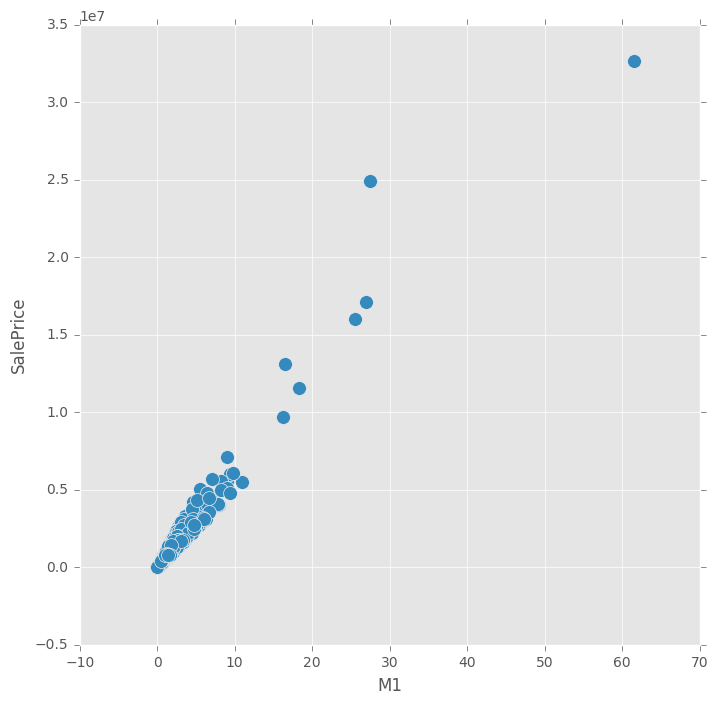

In [14]:
df.plot(kind = 'scatter', x = 'M1', y = 'SalePrice', s = 100, figsize = (8, 8))

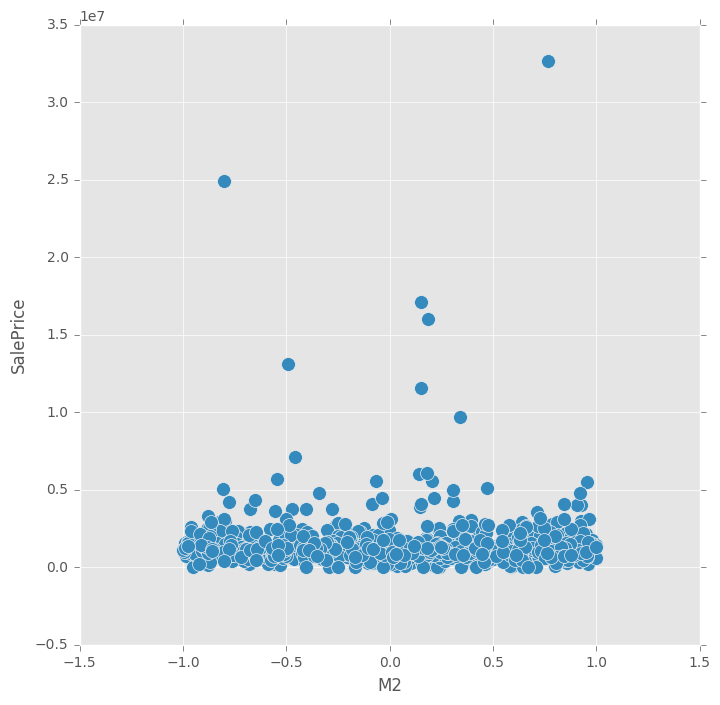

In [15]:
df[ ['SalePrice', 'M2'] ].plot(kind = 'scatter', x = 'M2', y = 'SalePrice', s = 100, figsize = (8, 8))

## Your first Machine Learning Models!

### Machine Learning Model #1 | `SalePrice` as a function of `M1`

In [17]:
X = df[['M1']]
y = df.SalePrice

model = smf.OLS(y,X).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 2.567e+04
Date:                Thu, 22 Sep 2016   Prob (F-statistic):               0.00
Time:                        19:17:11   Log-Likelihood:                -14393.
No. Observations:                1000   AIC:                         2.879e+04
Df Residuals:                     999   BIC:                         2.879e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
M1          6.241e+05   3894.990    160.228      0.000      6.16e+05  6.32e+05
==============================================================================
Omnibus:                     1044.296   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           901486.247
Skew:                           3.948   Prob(JB):                         0.00
Kurtosis:                     149.879   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Machine Learning Model #2 | `SalePrice` as a function of `M2`

In [19]:
X = df[['M2']]
y = df.SalePrice

model = smf.OLS(y,X).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06941
Date:                Thu, 22 Sep 2016   Prob (F-statistic):              0.792
Time:                        19:18:01   Log-Likelihood:                -16036.
No. Observations:                1000   AIC:                         3.207e+04
Df Residuals:                     999   BIC:                         3.208e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
M2          3.195e+04   1.21e+05      0.263      0.792     -2.06e+05   2.7e+05
==============================================================================
Omnibus:                     1664.600   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           986904.813
Skew:                          10.532   Prob(JB):                         0.00
Kurtosis:                     155.453   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""